In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df_test=pd.read_csv('Knn_test.csv', sep=',')
df_train=pd.read_csv('Knn_train.csv', sep=',')

In [4]:
df_test['code']=df_test['code'].astype('str')
df_train['code']=df_train['code'].astype('str')

# Objectif
Dans cette partie je vais faire une classification non-supervise pour classifier le produit en fonction de leur contenance en glucide et en acide gras. L;obejectif etant de pouvoir classifier les produits en produit sain pour un regime alimentaire a faible contenance calorifique (notemment en acide gras et glucides) pour pouvoir faire des recommendation nutritionelle pour une meilleur culture nutritionelle

# Description des datasets
## Training set 

In [5]:
df_train.shape

(156172, 13)

In [6]:
df_train.describe()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
count,156172.000000,156172.000000,156172.000000,156172.000000,156172.000000,156172.000000,156172.00000,156172.000000,156172.000000,156172.000000
mean,1128.407124,12.079542,4.709497,0.017893,32.292647,15.317435,2.67622,7.269490,0.637790,9.414048
std,757.406002,15.148028,7.331436,0.034201,27.337301,19.744705,4.26731,7.941661,2.357768,8.775288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-15.000000
25%,423.000000,0.400000,0.000000,0.000000,7.220000,1.333333,0.00000,1.220000,0.039370,2.000000
50%,1096.000000,6.033333,1.670000,0.000000,24.000000,5.910000,1.20000,5.200000,0.259843,10.000000
75%,1674.000000,19.782500,6.700000,0.022667,56.670000,23.500000,3.50000,10.000000,0.551181,16.000000
max,5128.830000,100.000000,100.000000,0.975000,100.000000,100.000000,50.00000,100.000000,100.000000,40.000000


In [7]:
df_train.corr()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.728191,0.572962,0.089558,0.543057,0.344917,0.277299,0.296866,-0.073813,0.626481
fat_100g,0.728191,1.000000,0.658301,0.241905,-0.034846,-0.006459,0.121554,0.242910,-0.043068,0.532043
saturated-fat_100g,0.572962,0.658301,1.000000,0.306196,0.009943,0.115100,0.003629,0.172475,-0.042277,0.610809
cholesterol_100g,0.089558,0.241905,0.306196,1.000000,-0.246152,-0.151464,-0.130761,0.362283,-0.000115,0.221886
carbohydrates_100g,0.543057,-0.034846,0.009943,-0.246152,1.000000,0.607083,0.231437,-0.089943,-0.069570,0.282655
sugars_100g,0.344917,-0.006459,0.115100,-0.151464,0.607083,1.000000,-0.021825,-0.248005,-0.093882,0.472238
fiber_100g,0.277299,0.121554,0.003629,-0.130761,0.231437,-0.021825,1.000000,0.230078,-0.025654,-0.119307
proteins_100g,0.296866,0.242910,0.172475,0.362283,-0.089943,-0.248005,0.230078,1.000000,0.006149,0.094971
sodium_100g,-0.073813,-0.043068,-0.042277,-0.000115,-0.069570,-0.093882,-0.025654,0.006149,1.000000,0.098788
nutrition-score-fr_100g,0.626481,0.532043,0.610809,0.221886,0.282655,0.472238,-0.119307,0.094971,0.098788,1.000000


## Testing set 

In [8]:
df_test.shape

(39043, 13)

In [9]:
df_test.describe()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
count,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000,39043.000000
mean,1123.535035,11.971055,4.684528,0.018218,32.193951,15.312767,2.681067,7.239463,0.626700,9.369900
std,755.934656,15.058317,7.349806,0.035755,27.329565,19.825713,4.279887,7.931748,2.316339,8.755494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,418.000000,0.400000,0.000000,0.000000,7.140000,1.300000,0.000000,1.220000,0.039370,2.000000
50%,1084.000000,6.030000,1.670000,0.000000,24.000000,5.830000,1.200000,5.130000,0.259000,10.000000
75%,1674.000000,19.283333,6.670000,0.023300,56.140000,23.330000,3.500000,10.000000,0.551181,16.000000
max,6001.191648,100.000000,100.000000,0.996000,100.000000,100.000000,50.000000,100.000000,92.500000,40.000000


In [10]:
df_test.corr()

,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.723784,0.568586,0.091010,0.546428,0.342677,0.276177,0.292679,-0.065882,0.621721
fat_100g,0.723784,1.000000,0.653025,0.234419,-0.031362,-0.012588,0.121896,0.237876,-0.037372,0.526079
saturated-fat_100g,0.568586,0.653025,1.000000,0.296011,0.007515,0.110251,0.009467,0.179330,-0.037981,0.602479
cholesterol_100g,0.091010,0.234419,0.296011,1.000000,-0.234141,-0.145223,-0.133538,0.360852,0.002295,0.215565
carbohydrates_100g,0.546428,-0.031362,0.007515,-0.234141,1.000000,0.613525,0.224157,-0.090696,-0.066559,0.285828
sugars_100g,0.342677,-0.012588,0.110251,-0.145223,0.613525,1.000000,-0.029706,-0.247555,-0.093364,0.472023
fiber_100g,0.276177,0.121896,0.009467,-0.133538,0.224157,-0.029706,1.000000,0.233231,-0.022683,-0.122172
proteins_100g,0.292679,0.237876,0.179330,0.360852,-0.090696,-0.247555,0.233231,1.000000,0.007919,0.094663
sodium_100g,-0.065882,-0.037372,-0.037981,0.002295,-0.066559,-0.093364,-0.022683,0.007919,1.000000,0.103593
nutrition-score-fr_100g,0.621721,0.526079,0.602479,0.215565,0.285828,0.472023,-0.122172,0.094663,0.103593,1.000000


## Indicateurs quantitatives
La calassification se fera sur des variable quantitatives

In [11]:
num=df_train.dtypes
num=num[num=='float64'].index
num

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

# Choix des indicateurs pour la classification
Mon objectif est de categoriser les produits par leur contenance en matiere grasse et glucide et par leur apport energetique et eventuellement leur nutriscore. La classification doit prendre un compte les indicateurs avec une variance significative. Je vais donc supprimer les indicateurs a faible variance avant de faire la classification

## Variances des indicateurs

In [12]:
df_test.var().sort_values()

cholesterol_100g                0.001278
sodium_100g                     5.365429
fiber_100g                     18.317429
saturated-fat_100g             54.019648
proteins_100g                  62.912632
nutrition-score-fr_100g        76.658679
fat_100g                      226.752909
sugars_100g                   393.058894
carbohydrates_100g            746.905142
energy_100g                571437.203875
dtype: float64

## VarianceThreshold


Je commence par examiner tous les indicateurs en utilisant une methode feature selection. j'utilise **VarianceThreshold** comme je travaille sur un model non-supervise

In [13]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(20)

X1=sel.fit_transform(df_train[num])
X1.shape

(156172, 7)

### Resultat
**VarianceThreshold** X1 ne contient plus les indicateurs "cholesterol, sodium et fiber"

Indicateurs restants apres Variance Threshhold:

['energy_100g','fat_100g','saturated-fat_100g', 'carbohydrates_100g','sugars_100g','proteins_100g','nutrition-score-fr_100g']


Je choisit de ne pas inclure la variable nutriscore pour la classification du dataset. 

In [14]:
X=np.delete(X1, np.s_[6], axis=1)                      


In [15]:
X.shape

(156172, 6)

### Indicateurs a garder pour la calssification

In [16]:
num1=['energy_100g','fat_100g','saturated-fat_100g', 'carbohydrates_100g','sugars_100g','proteins_100g']


# Classification non-supevisee par methode Kmeans

## Normalisation des jeux de donnees
L'indicateur energy n'est pas dans le meme domaine de gradeur que les indicateurs nutritionnelle. Il faudrait donc faire une normalisation des donnees avant la classification. Pour cela j'utilise **StandardScaler**

### Scaling training set

In [17]:
scaler=preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)
names=df_train['product_name']
features=df_train[num1].columns
categories=df_train['pnns_groups_1']

### Scaling testing set

In [18]:
X_test=df_test[num1].values
Xtest_scaled=scaler.transform(X_test)

## Choix du nombre de clusters
J'utilise la methode Kmeans pour faire la classification de mes produits. Cependant pour cela il me faut decider le nombre  de clusters optimal pour cette classification. Pour ce faire j'utilise la methode du coude ainsi que le silhouette score pour avoir une meilleur idee de la meilleure classification

In [19]:
def get_score(X, a,b):
    score=[]
    inertia=[]
    for k in range(a,b):
        kmeans = KMeans(n_clusters=k) 
        y_pred = kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)
        score.append(silhouette_score(X, kmeans.labels_, sample_size=10000))
    plt.plot(range(a,b), score)
    plt.title('Silhouette Score')
    plt.show()
    plt.plot(range(a,b), inertia)
    plt.title('Elbow method')
    plt.show()

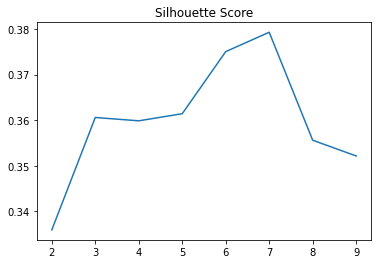

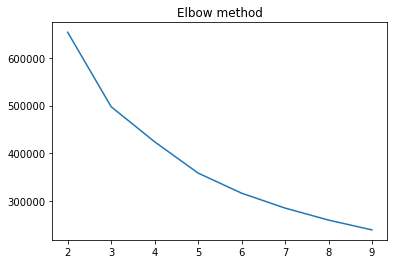

In [20]:
get_score(X_scaled,2,10)

## Kmeans avec 6 clusters


Le nombre optimal de clusters est 6 clusters. Je fais donc un fit_predict sur le training set et je fait un predict sur le test set afin de limite un peu la correlation entre les donnees

### Training set:

In [21]:
kmeans = KMeans(n_clusters=6) 
y_pred = kmeans.fit_predict(X_scaled)
silhouette_score(X_scaled, kmeans.labels_, sample_size=10000)

0.3792685381268255

### Testing set:

In [22]:
y_test=kmeans.predict(Xtest_scaled)

# Validation de la classification en utilisant des classificateurs supervises
Dans cette partie je fait une classification supervisee du jeu de donnee avec les labels recuperer par le Kmean afin de comprendre les feature Importances de mes indicateurs. Le training set sera utiliser pour generer le model et le testing set sera utiliser pour la validation

## Decision tree Classifier

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_scaled, y_pred)

## Random Forest Classifier

In [24]:
forest_clf = RandomForestClassifier(random_state=42) 
forest_clf.fit(X_scaled, y_pred)

RandomForestClassifier(random_state=42)

## Xgboost Classifier

In [25]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_scaled, y_pred)

[13:35:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Synthese des resultats

### Feature importances

In [26]:
featureImp=pd.DataFrame(num1, columns=['Features'])
featureImp['Decision Tree']=clf.feature_importances_
featureImp['Random Forest']=forest_clf.feature_importances_
featureImp['Xgboost']=xgb_clf.feature_importances_
featureImp

,Features,Decision Tree,Random Forest,Xgboost
0,energy_100g,0.289323,0.236659,0.246509
1,fat_100g,0.110404,0.120074,0.131350
2,saturated-fat_100g,0.147415,0.113709,0.118678
3,carbohydrates_100g,0.126285,0.182712,0.136760
4,sugars_100g,0.148648,0.160258,0.210681
5,proteins_100g,0.177925,0.186588,0.156021


On remarque que l'importance des indicateurs differe d'une methode a une autre, mais les indicateurs les plus important dans cette classification sont energy, sugars (ou carbohydrates selon les methodes) et proteins. Cette explicabilite est satisfaisante pour mon objectif de caracteriser les produits par le contenance en matiere grasse et glucide (l'energi est res fortement correle avec les matieres grasses)

### Cross validation score
Je fais une validation croisee sur le training set en prenant cv=5 sur les trois classificateurs

In [28]:
Score=pd.DataFrame()

In [29]:
Score['Decision Tree' ]=cross_val_score(clf, X_scaled, y_pred, cv=5, scoring="f1_weighted")
Score['Random Forest' ]=cross_val_score(forest_clf, X_scaled, y_pred, cv=5, scoring="f1_weighted")
Score['Xgboost' ]=cross_val_score(xgb_clf, X_scaled, y_pred, cv=5, scoring="f1_weighted")

[13:39:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

In [30]:
Score

,Decision Tree,Random Forest,Xgboost
0,0.978154,0.988506,0.990972
1,0.978261,0.988696,0.991610
2,0.978516,0.988184,0.991229
3,0.977879,0.987514,0.990810
4,0.978669,0.987352,0.990521


In [31]:
Score.mean().values

array([0.97829576, 0.98805061, 0.99102856])

Il est clair qu'on est dans une situation d'over-fitting, mais si on compare relativement les indicateurs on remarque que Xgboost donne les meilleurs resultats. On peut donc choisir de l'utiliser pour des eventuel predictions de nouveaux produits qui ne sont pas dans le dataset.

### Validation sur le test set

In [32]:
y_tree=clf.predict(Xtest_scaled)
y_forest=forest_clf.predict(Xtest_scaled)
y_xgb=xgb_clf.predict(Xtest_scaled)

#### Score moyen sur tous les labels

In [33]:
TestScore=pd.DataFrame()
from sklearn.metrics import f1_score
TestScore['Decision tree']=[f1_score(y_test, y_tree, average='weighted')]
TestScore['Random Forest']=[f1_score(y_test, y_forest, average='weighted')]
TestScore['XGboost']=[f1_score(y_test, y_xgb, average='weighted')]
TestScore

,Decision tree,Random Forest,XGboost
0,0.979078,0.988498,0.992084


#### Score par label

In [34]:
ScoreParLabel=pd.DataFrame()
from sklearn.metrics import f1_score
ScoreParLabel['Decision tree']=f1_score(y_test, y_tree, average=None)
ScoreParLabel['Random Forest']=f1_score(y_test, y_forest, average=None)
ScoreParLabel['XGboost']=f1_score(y_test, y_xgb, average=None)
ScoreParLabel

,Decision tree,Random Forest,XGboost
0,0.970260,0.984388,0.990579
1,0.991149,0.995560,0.996274
2,0.962734,0.980969,0.987619
3,0.966503,0.978623,0.984525
4,0.981818,0.988761,0.992654
5,0.975080,0.984900,0.989031


# Etude de la classification

In [40]:
df_train['labels']=y_pred
df_train["nutri-score"] = pd.cut(df_train["nutrition-score-fr_100g"], bins=[-15, -4, 7, 18, 29, 40], labels=['A', 'B', 'C', 'D', 'E'])
df1=df_train

## Anova
Dans cette partie nous allons verifier si la difference des valeurs moyennes des indicateurs entre les trois groupes est significatives. Pour cela nous regarderons les tables Anova pour tous les indicateurs (meme ceux non inclus dans la classification) en fonction des groupes de classification. Nous regarderons egalement le rapport de correlation "eta^2" pour avoir une meilleur idee de la proportion de differenc eentre les groupes

In [42]:
df1=df1.rename(columns={'saturated-fat_100g': 'saturated_fat_100g'})

In [43]:
num1=['energy_100g','saturated_fat_100g',
 'fat_100g','cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g','fiber_100g',
 'proteins_100g','sodium_100g']

### Representations des distribution des moyennes des indicateurs par groupe et par nutriscore, anova et eta^2

Etude sur indicateur : energy_100g
______________


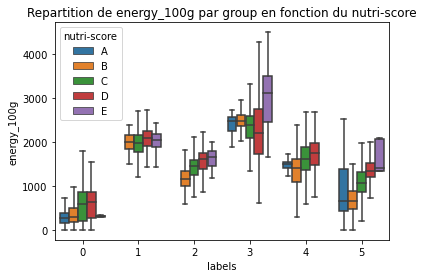

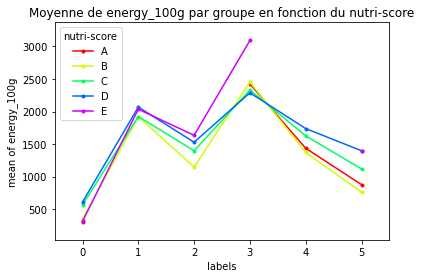

                 sum_sq        df             F  PR(>F)
C(labels)  6.850876e+10       5.0  101501.74948     0.0
Residual   2.108090e+10  156166.0           NaN     NaN
---------------
Effect size= 0.7646949795640119
---------------
Etude sur indicateur : saturated_fat_100g
______________


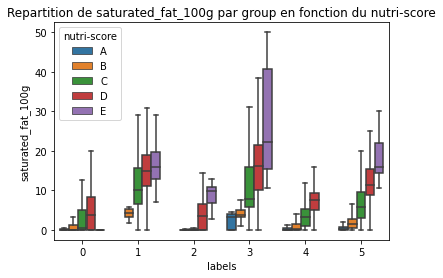

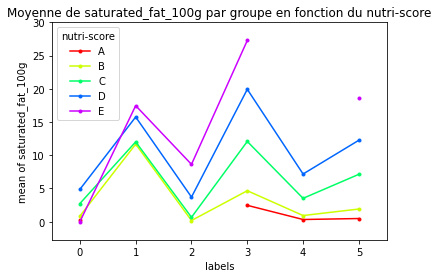

                 sum_sq        df             F  PR(>F)
C(labels)  4.074434e+06       5.0  29459.474826     0.0
Residual   4.319751e+06  156166.0           NaN     NaN
---------------
Effect size= 0.48538765032573505
---------------
Etude sur indicateur : fat_100g
______________


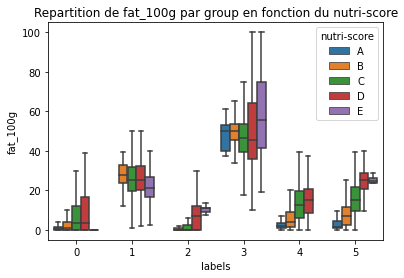

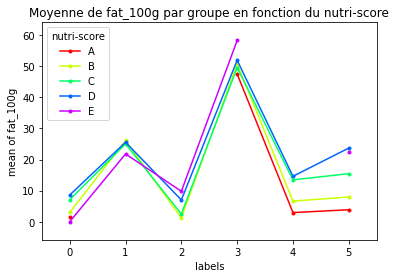

                 sum_sq        df             F  PR(>F)
C(labels)  2.365630e+07       5.0  60666.210624     0.0
Residual   1.217913e+07  156166.0           NaN     NaN
---------------
Effect size= 0.6601371022083533
---------------
Etude sur indicateur : cholesterol_100g
______________


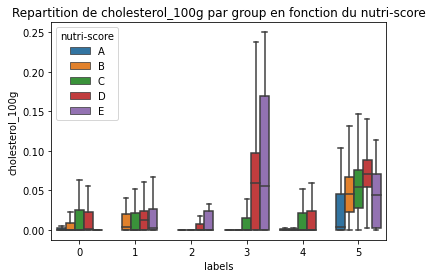

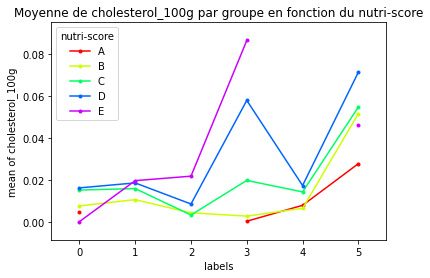

               sum_sq        df            F  PR(>F)
C(labels)   40.978996       5.0  9032.483855     0.0
Residual   141.700245  156166.0          NaN     NaN
---------------
Effect size= 0.2243221271965803
---------------
Etude sur indicateur : carbohydrates_100g
______________


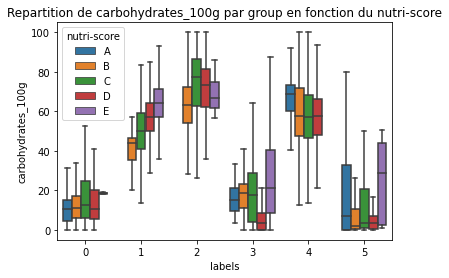

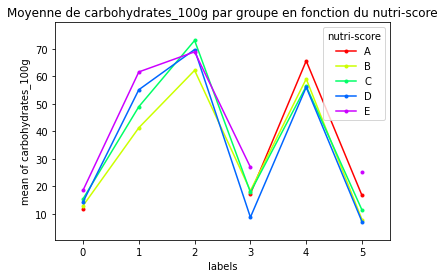

                 sum_sq        df             F  PR(>F)
C(labels)  8.804637e+07       5.0  95936.079157     0.0
Residual   2.866460e+07  156166.0           NaN     NaN
---------------
Effect size= 0.7543966576906104
---------------
Etude sur indicateur : sugars_100g
______________


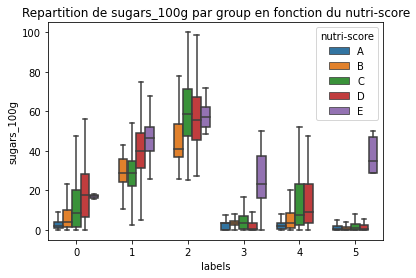

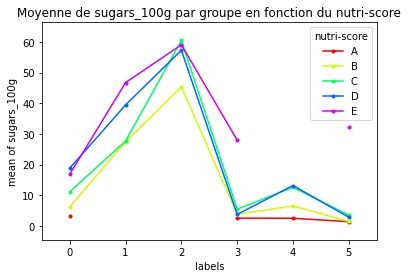

                 sum_sq        df             F  PR(>F)
C(labels)  4.514279e+07       5.0  89572.062322     0.0
Residual   1.574100e+07  156166.0           NaN     NaN
---------------
Effect size= 0.741458282531908
---------------
Etude sur indicateur : fiber_100g
______________


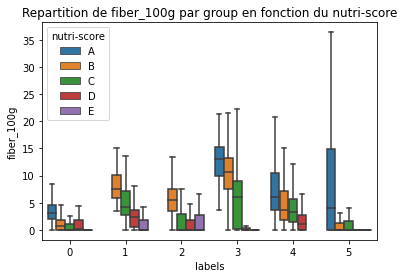

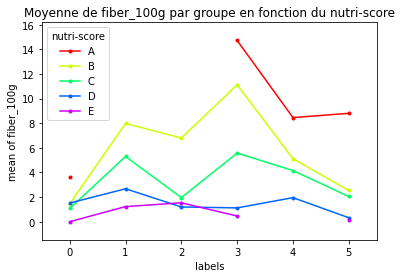

                 sum_sq        df            F  PR(>F)
C(labels)  2.599804e+05       5.0  3142.564434     0.0
Residual   2.583883e+06  156166.0          NaN     NaN
---------------
Effect size= 0.09141802330568617
---------------
Etude sur indicateur : proteins_100g
______________


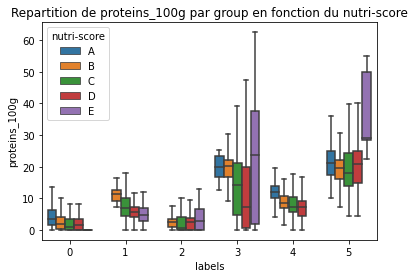

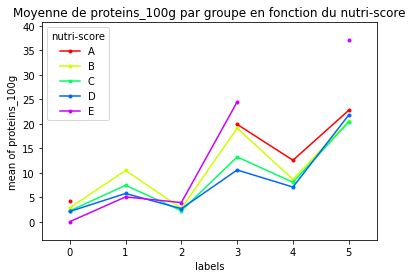

                 sum_sq        df            F  PR(>F)
C(labels)  5.612532e+06       5.0  41371.31255     0.0
Residual   4.237171e+06  156166.0          NaN     NaN
---------------
Effect size= 0.5698173721860345
---------------
Etude sur indicateur : sodium_100g
______________


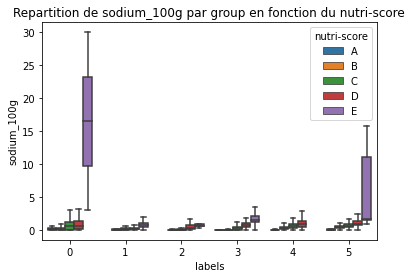

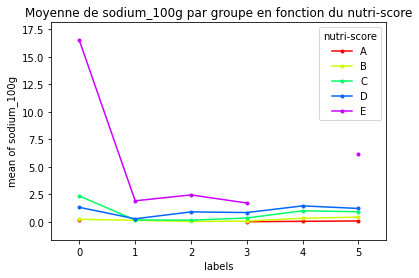

                  sum_sq        df           F         PR(>F)
C(labels)    5589.585924       5.0  202.394507  7.790196e-216
Residual   862576.051998  156166.0         NaN            NaN
---------------
Effect size= 0.006438386501663231
---------------


In [44]:
eta=pd.DataFrame()
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
for indic in num1:
    print('Etude sur indicateur : ' + indic)
    print('______________')
    sns.boxplot(x="labels", y=indic, hue='nutri-score', data=df1, showfliers=False)
    plt.title('Repartition de '+ indic + ' par group en fonction du nutri-score')
    plt.show()
    fig = interaction_plot(x=df1['labels'], trace=df1['nutri-score'], response=df1[indic])
    plt.title('Moyenne de ' + indic + " par groupe en fonction du nutri-score" )
    plt.show()
    model = ols(indic+ '~ C(labels)',data=df1).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    print('---------------')
    esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    eta[indic] =[esq_sm]
    print('Effect size= ' + str(esq_sm))
    print('---------------')
    
    

Les p-values de tous les indicateurs sont tres faible impliquant une difference significative des moyennes par groupe, ce qui signifie que la classification est acceptable. Cependant les rapports de correlation varie en fonction de l'importance de l'indicateur dans la classification (tres grand effet pour energy, carbohydrates, sugars et fat), (moyen pour saturated-fat et protein) (faible pour cholesterol) et (tres faible pour fiber et sodium).


### Synthese des rapport de correlation

Ces resultats restent tres acceptables pour notre obejectif

In [45]:
eta

,energy_100g,saturated_fat_100g,fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
0,0.764695,0.485388,0.660137,0.224322,0.754397,0.741458,0.091418,0.569817,0.006438


## Visualisation des clusters par pair d'indicateurs (inclus dans la classification)

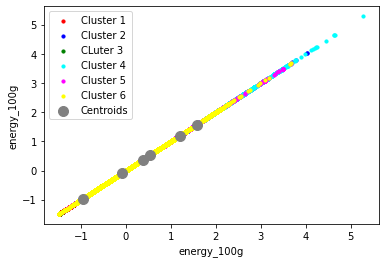

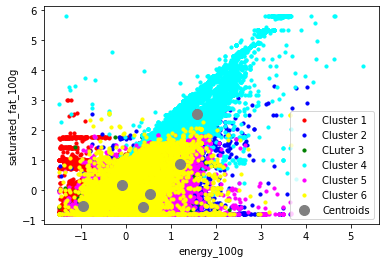

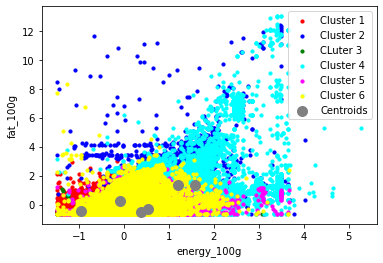

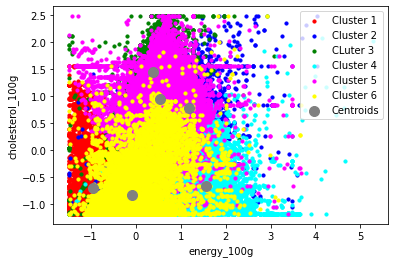

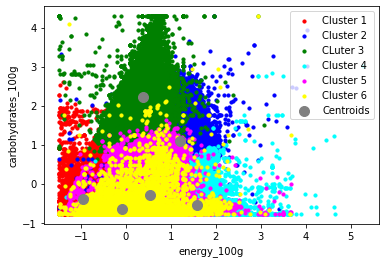

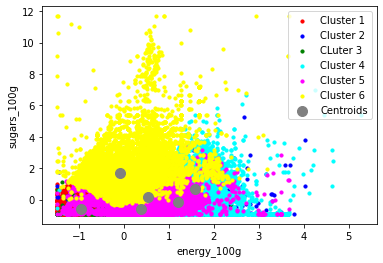

IndexError: index 6 is out of bounds for axis 1 with size 6

In [46]:
#Visualising the clusters
for a in range(0,len(num1)):
    for b in range(0,len(num1)):
        plt.scatter(X_scaled[y_pred == 0, a], X_scaled[y_pred == 0, b], s = 10, c = 'red', label = 'Cluster 1')
        plt.scatter(X_scaled[y_pred == 1, a], X_scaled[y_pred == 1, b], s = 10, c = 'blue', label = 'Cluster 2')
        plt.scatter(X_scaled[y_pred == 2, a], X_scaled[y_pred == 2, b], s = 10, c = 'green', label = 'CLuter 3')
        plt.scatter(X_scaled[y_pred == 3, a], X_scaled[y_pred == 3, b], s = 10, c = 'cyan', label = 'Cluster 4')
        plt.scatter(X_scaled[y_pred == 4, a], X_scaled[y_pred == 4, b], s = 10, c = 'magenta', label = 'Cluster 5')
        plt.scatter(X_scaled[y_pred == 5, a], X_scaled[y_pred == 5, b], s = 10, c = 'yellow', label = 'Cluster 6')
        plt.scatter(kmeans.cluster_centers_[:,a], kmeans.cluster_centers_[:,b], s = 100, c = 'grey', label = 'Centroids')
        plt.xlabel(num1[a])
        plt.ylabel(num1[b])
        plt.legend()
        plt.show()


Cette representation ne donne pas beaucoup d'informations sur les clusters. Nous ferons donc une reduction de dimension par ACP pour pouvoir representer tous les indicateurs sur un meme graphe.

# ACP pour la visualisation des clusters


## Construction de l'ACP
Je commence par faire une ACP sur ces indicateurs afin de comprendre leurs interactions en prenans comme critere une representation minimale de la variance de 80%

In [51]:
pca=decomposition.PCA(n_components=0.80)
pca.fit(X_scaled)

PCA(n_components=0.8)

### Repartition de l'explicabilite de la varriance

In [52]:
pca.explained_variance_ratio_

array([0.42633726, 0.29139798, 0.14667619])

In [53]:
cumsum = np.cumsum(pca.explained_variance_ratio_) 
cumsum

array([0.42633726, 0.71773525, 0.86441144])

A l'aide de l'ACP on peut faire une reduction de dimension sur 3 variables qui represente 86% de l'information

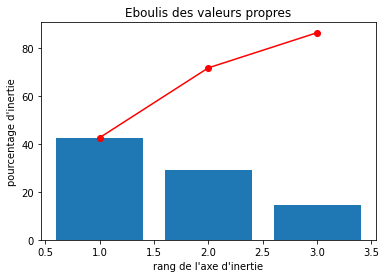

In [54]:
display_scree_plot(pca)

### Le dataset transformee par l'ACP

In [55]:
XPCA = pca.transform(X_scaled)
XPCA

array([[-2.03920253e+00,  1.25948547e-01, -7.49940310e-01],
       [ 8.15044746e-02,  4.14098215e-02,  2.29759613e+00],
       [-2.07148041e+00,  2.12094723e-01, -7.34076494e-01],
       ...,
       [-1.28975050e-01, -4.48406144e-01,  1.43712107e+00],
       [-2.16081423e+00,  3.44934521e-01, -7.33468771e-01],
       [-1.82644956e+00,  2.19426294e-03, -6.85684544e-01]])

In [56]:
pd.DataFrame(XPCA).corr().style.background_gradient()

,0,1,2
0,1.000000,-0.000000,-0.000000
1,-0.000000,1.000000,-0.000000
2,-0.000000,-0.000000,1.000000


On remarque que les feature importances des indicateurs different d'une methode de classification a une autre. Mais ils sont plus ou moins tous pris en compte dans la classification meme si l'effet de l'energie est le plus important suivi par celui des proteins

### Transformation des centres d'inertie par l'ACP

In [57]:
centers=pca.transform(kmeans.cluster_centers_)
centers.shape

(6, 3)

## Visualisation des clusters en utilisant l'ACP
Les projections par indicateurs ne donnent pas une vision clair des classifications. On represente donc cette classification sur l'ACP du dataset avec le 3 composantes generees. Pour cela on transforme aussi les centres de gravites des classes
### Representation 2D par pair de plans factoriels

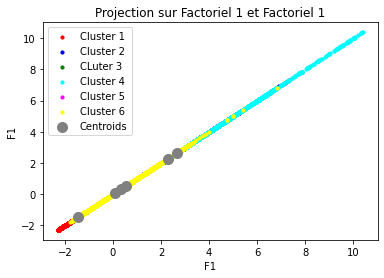

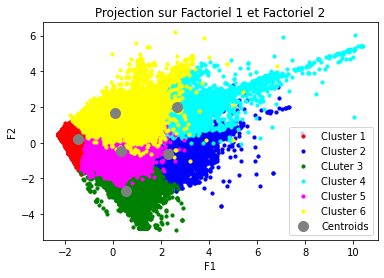

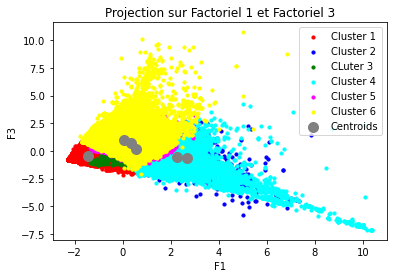

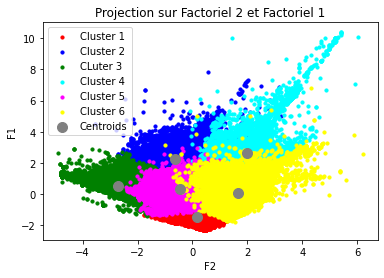

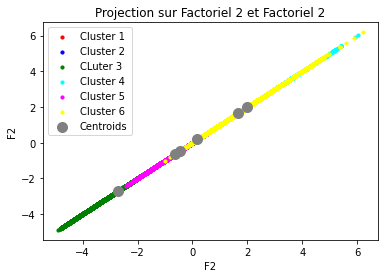

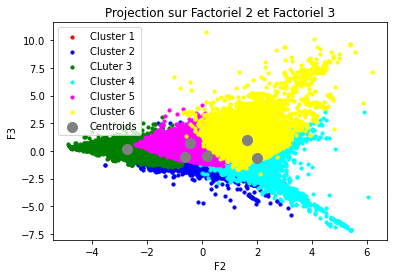

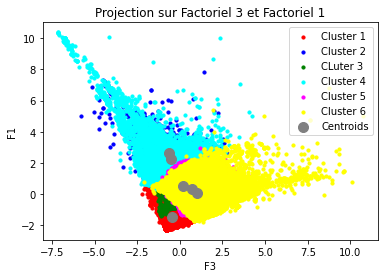

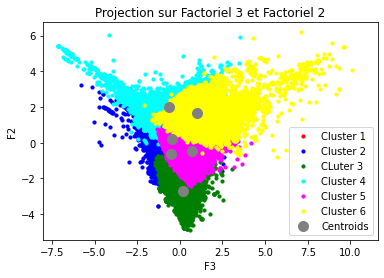

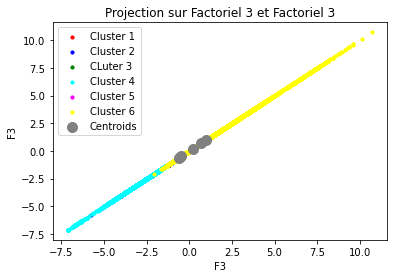

In [58]:
for a in range(0,3):
    for b in range(0,3):
        plt.scatter(XPCA[y_pred == 0, a], XPCA[y_pred == 0, b], s = 10, c = 'red', label = 'Cluster 1')
        plt.scatter(XPCA[y_pred == 1, a], XPCA[y_pred == 1, b], s = 10, c = 'blue', label = 'Cluster 2')
        plt.scatter(XPCA[y_pred == 2, a], XPCA[y_pred == 2, b], s = 10, c = 'green', label = 'CLuter 3')
        plt.scatter(XPCA[y_pred == 3, a], XPCA[y_pred == 3, b], s = 10, c = 'cyan', label = 'Cluster 4')
        plt.scatter(XPCA[y_pred == 4, a], XPCA[y_pred == 4, b], s = 10, c = 'magenta', label = 'Cluster 5')
        plt.scatter(XPCA[y_pred == 5, a], XPCA[y_pred == 5, b], s = 10, c = 'yellow', label = 'Cluster 6')
        plt.scatter(centers[:,a], centers[:,b], s = 100, c = 'grey', label = 'Centroids')
        plt.xlabel('F'+str(a+1) )
        plt.ylabel('F'+str(b+1))
        plt.title('Projection sur Factoriel '+str(a+1)+ ' et Factoriel '+str(b+1))
        plt.legend()
        plt.show()


Bien que la classification n'est pas parfaite mais elle donne un meilleur visuel des 6 clusters. Une visualisation en 3D nous permet de voir plus d'informations

## Visualisation en 3D

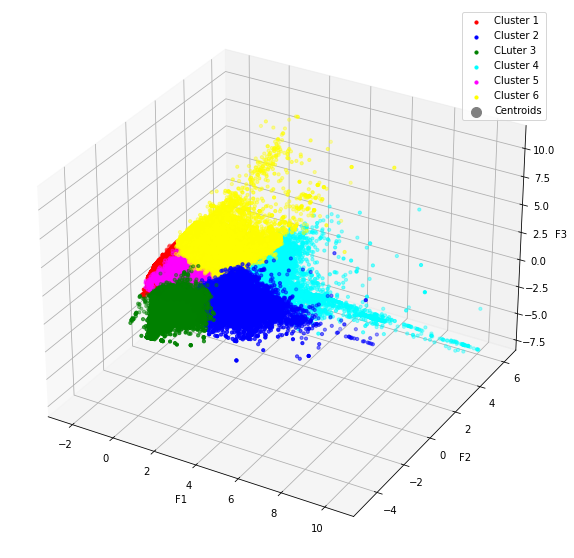

In [59]:
a=0
b=1
c=2
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(XPCA[y_pred == 0, a], XPCA[y_pred == 0, b], XPCA[y_pred == 0, c], s = 10, c = 'red', label = 'Cluster 1')
ax.scatter(XPCA[y_pred == 1, a], XPCA[y_pred == 1, b], XPCA[y_pred == 1, c], s = 10, c = 'blue', label = 'Cluster 2')
ax.scatter(XPCA[y_pred == 2, a], XPCA[y_pred == 2, b], XPCA[y_pred == 2, c], s = 10, c = 'green', label = 'CLuter 3')
ax.scatter(XPCA[y_pred == 3, a], XPCA[y_pred == 3, b], XPCA[y_pred == 3, c], s = 10, c = 'cyan', label = 'Cluster 4')
ax.scatter(XPCA[y_pred == 4, a], XPCA[y_pred == 4, b], XPCA[y_pred == 4, c], s = 10, c = 'magenta', label = 'Cluster 5')
ax.scatter(XPCA[y_pred == 5, a], XPCA[y_pred == 5, b], XPCA[y_pred == 5, c], s = 10, c = 'yellow', label = 'Cluster 6')
ax.scatter(centers[:,a], centers[:,b],centers[:,c], s = 100, c = 'grey', label = 'Centroids')
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.legend()
plt.show()


# Distribution des indicateurs par groupe
Nous allons etudier la distribution des indicareurs importants sur les 6 groupes generer par la classifiction Kmeans

In [60]:
num=['energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

## Distribution des indicateurs par groupe

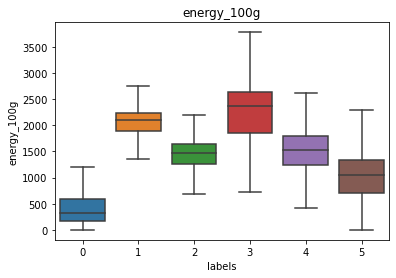

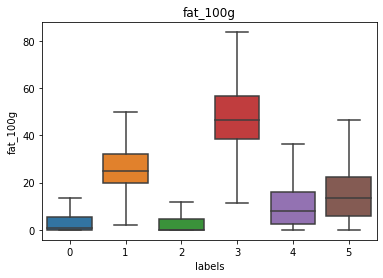

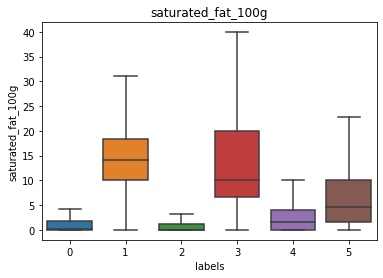

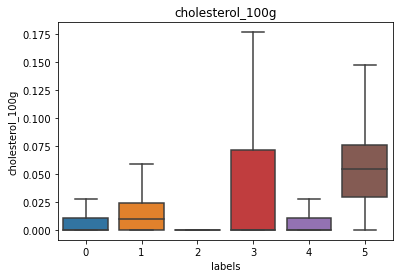

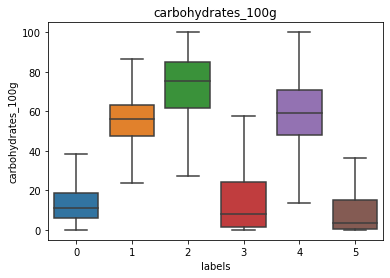

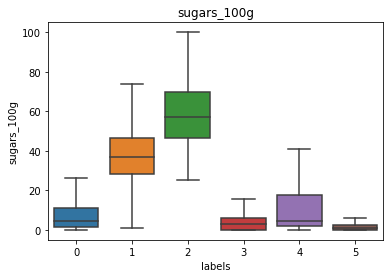

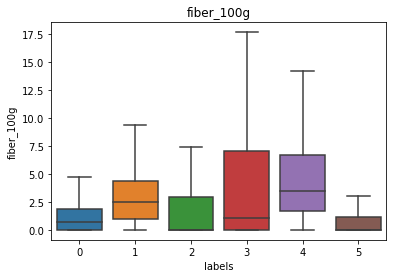

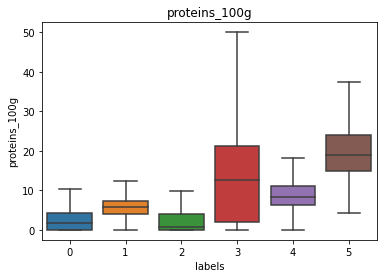

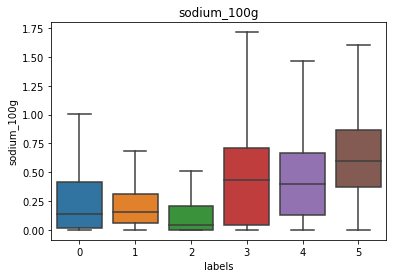

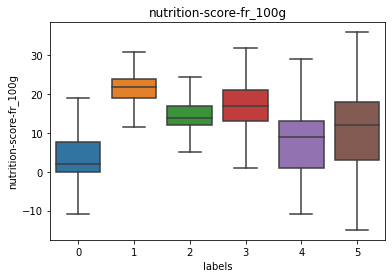

In [61]:
for indic in num:
    sns.boxplot(x='labels', y=indic,showfliers=False, data=df1)
    plt.title(indic)
    plt.show()


## Repartition des produits par groupes

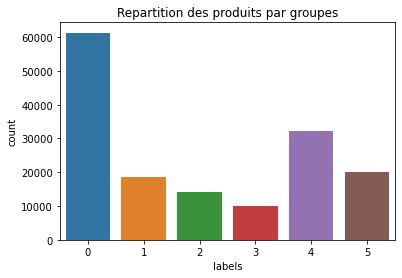

In [62]:
sns.countplot(x='labels', data=df1)
plt.title('Repartition des produits par groupes')
plt.show()

### En prenant en compte les nutri-score

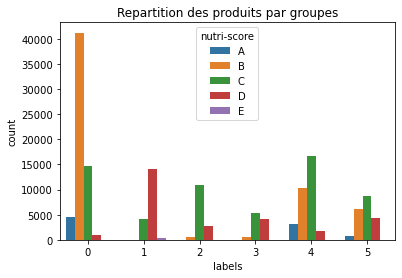

In [63]:
sns.countplot(x='labels', hue='nutri-score',data=df1)
plt.title('Repartition des produits par groupes')
plt.show()

## Distribution des nutri-score dans le dataset

In [64]:
tot=df1['nutri-score'].value_counts()

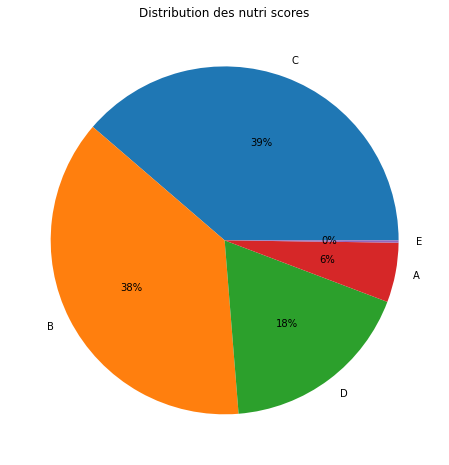

In [65]:
plt.figure(figsize=(8,8))
plt.pie(tot, labels = tot.index, autopct='%.0f%%')
plt.title('Distribution des nutri scores')
plt.show()

## Etude des indicateurs par groupes


In [66]:
groups=df1.groupby('labels')
group0=groups.get_group(0)
group1=groups.get_group(1)
group2=groups.get_group(2)
group3=groups.get_group(3)
group4=groups.get_group(4)
group5=groups.get_group(5)

group=[group0, group1, group2,group3,group4, group5]

## La distribution des 'mauvais" indicateurs dans chaque groupe

In [69]:
bad=['saturated_fat_100g', 'cholesterol_100g','carbohydrates_100g',
       'sugars_100g','proteins_100g']

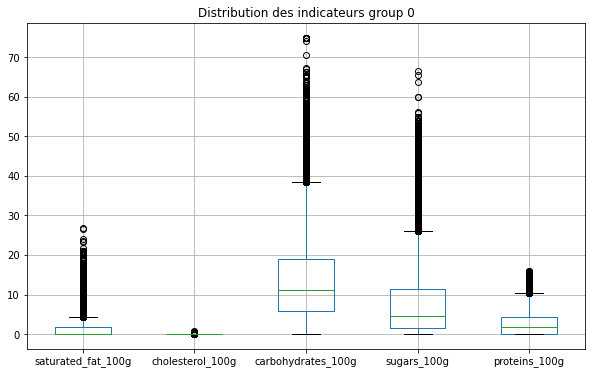

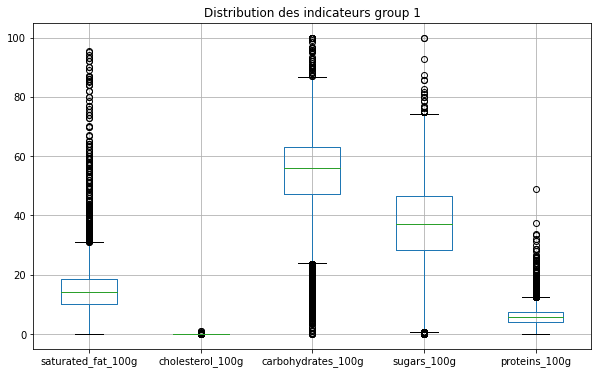

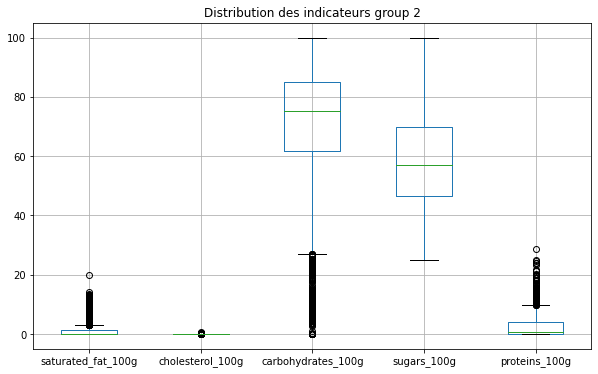

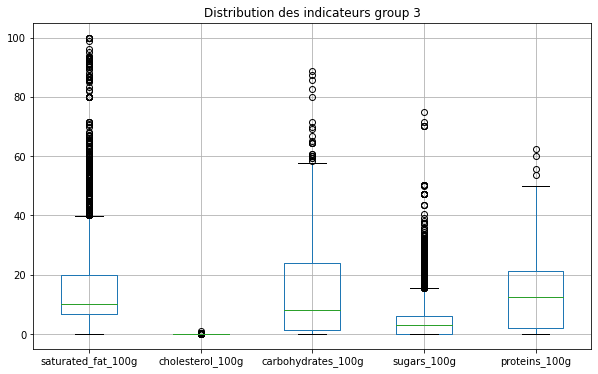

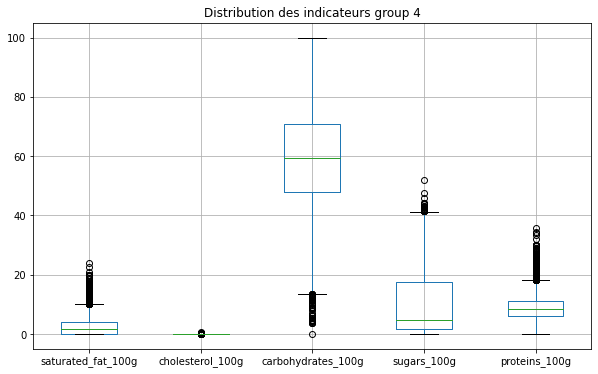

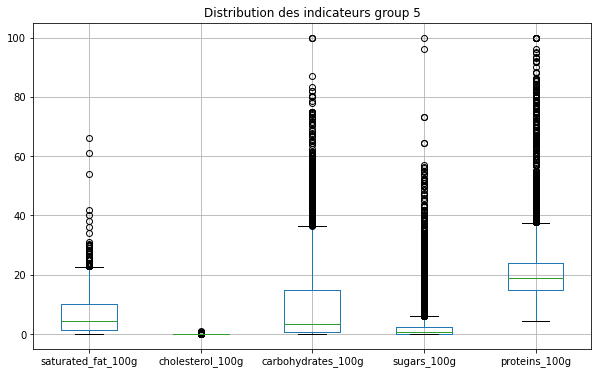

In [70]:
i=0
for g in group:
    plt.figure(figsize=(10,6))
    g[bad].boxplot()
    plt.title('Distribution des indicateurs group '+ str(i))
    i=i+1
    plt.show()

## Le pourcentage de nutri-score dans chaque groupe

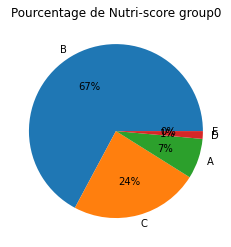

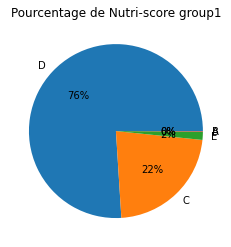

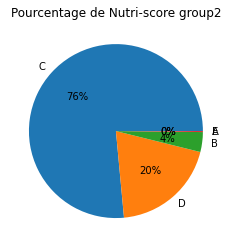

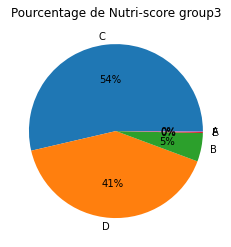

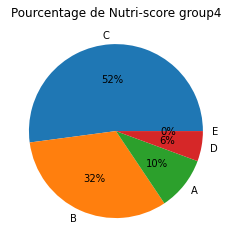

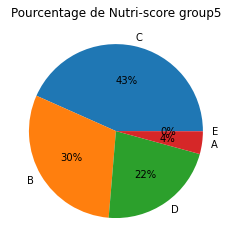

In [71]:
i=0
for g in group:
    data=g['nutri-score'].value_counts()
    plt.pie(data.values, labels=data.index,autopct='%.0f%%')
    plt.title('Pourcentage de Nutri-score group' + str(i))
    plt.show()
    i=i+1
    plt.show()
    

## Representation des categories par groupe
On calcule le pourcentage des categories de produits dans chaque groupe et on represent les categories les plus representees dans chaque groupe

In [72]:
counts = df1['pnns_groups_1'].value_counts()
counts=counts.to_frame()
counts['Categories']=counts.index
counts=counts.rename(columns={'pnns_groups_1': 'Cat'})

In [73]:
counts0 = group0['pnns_groups_1'].value_counts()
counts0=counts0.to_frame()
counts0['Categories']=counts0.index
counts0=counts0.rename(columns={'pnns_groups_1': 'Cat0'})

In [74]:
counts1 = group1['pnns_groups_1'].value_counts()
counts1=counts1.to_frame()
counts1['Categories']=counts1.index
counts1=counts1.rename(columns={'pnns_groups_1': 'Cat1'})

In [75]:
counts2 = group2['pnns_groups_1'].value_counts()
counts2=counts2.to_frame()
counts2['Categories']=counts2.index
counts2=counts2.rename(columns={'pnns_groups_1': 'Cat2'})

In [76]:
counts3 = group3['pnns_groups_1'].value_counts()
counts3=counts3.to_frame()
counts3['Categories']=counts3.index
counts3=counts3.rename(columns={'pnns_groups_1': 'Cat3'})

In [77]:
counts4 = group4['pnns_groups_1'].value_counts()
counts4=counts4.to_frame()
counts4['Categories']=counts4.index
counts4=counts4.rename(columns={'pnns_groups_1': 'Cat4'})

In [78]:
counts5 = group5['pnns_groups_1'].value_counts()
counts5=counts5.to_frame()
counts5['Categories']=counts5.index
counts5=counts5.rename(columns={'pnns_groups_1': 'Cat5'})

In [79]:
X=pd.merge(counts, counts0, how='inner',left_on='Categories', right_on='Categories')
X=pd.merge(X, counts1, how='inner',left_on='Categories', right_on='Categories')
X=pd.merge(X, counts2, how='inner',left_on='Categories', right_on='Categories')
X=pd.merge(X, counts3, how='inner',left_on='Categories', right_on='Categories')
X=pd.merge(X, counts4, how='inner',left_on='Categories', right_on='Categories')
X=pd.merge(X, counts5, how='inner',left_on='Categories', right_on='Categories')

In [80]:
X['pctgroup0']=X['Cat0']/X['Cat']
X['pctgroup1']=X['Cat1']/X['Cat']
X['pctgroup2']=X['Cat2']/X['Cat']
X['pctgroup3']=X['Cat3']/X['Cat']
X['pctgroup4']=X['Cat4']/X['Cat']
X['pctgroup5']=X['Cat5']/X['Cat']

In [81]:
X.drop(columns=['Cat', 'Cat0', 'Cat1', 'Cat2','Cat3','Cat4','Cat5'], inplace=True)

X=X.set_index('Categories')

In [82]:
X.head()

,pctgroup0,pctgroup1,pctgroup2,pctgroup3,pctgroup4,pctgroup5
Categories,,,,,,
unknown,0.413024,0.078216,0.095626,0.055440,0.222788,0.134907
Sugary snacks,0.119020,0.501614,0.192398,0.024508,0.150475,0.011985
Fruits and vegetables,0.687817,0.047716,0.127411,0.021827,0.088198,0.027030
Fish Meat Eggs,0.158597,0.001799,0.002998,0.059811,0.045420,0.731375
Cereal and Grains,0.200886,0.061874,0.084523,0.032825,0.602166,0.017725


In [83]:
X.describe()

,pctgroup0,pctgroup1,pctgroup2,pctgroup3,pctgroup4,pctgroup5
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.398639,0.066180,0.046457,0.124239,0.219704,0.144781
std,0.283595,0.106430,0.052896,0.207986,0.264214,0.221649
min,0.019370,0.001321,0.000264,0.003170,0.009247,0.006181
25%,0.148815,0.010487,0.003588,0.007210,0.037017,0.024079
50%,0.317460,0.035602,0.018391,0.024508,0.088198,0.032328
75%,0.685255,0.071387,0.076477,0.157697,0.399458,0.180648
max,0.947160,0.501614,0.192398,0.862094,0.810219,0.812808


## Repartition des categories de produits par groupe
On represente uniquement les categories qui sont presentes a plus de 18% dans le groupe (pour prendre en compte au moins une categorie dans chaque groupe)

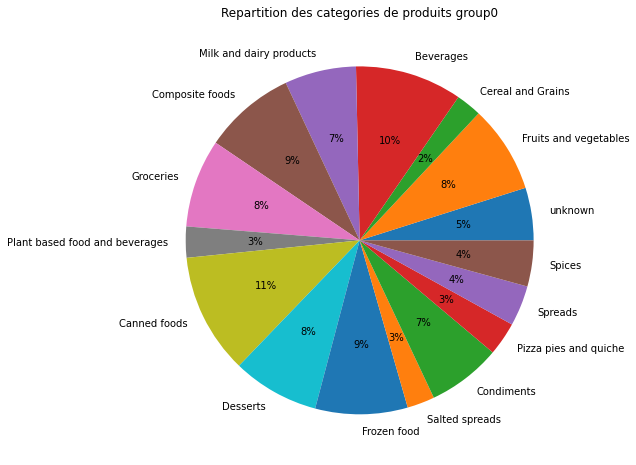

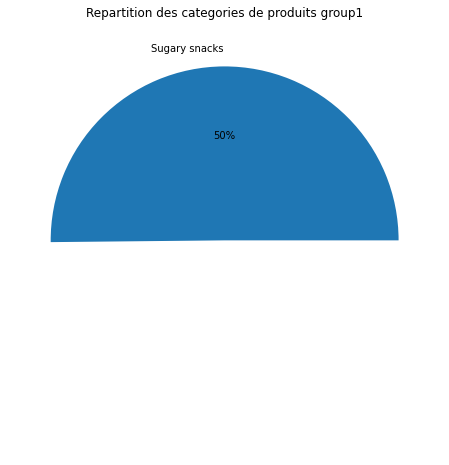

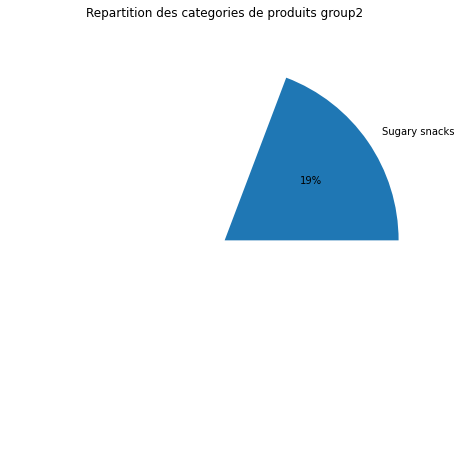

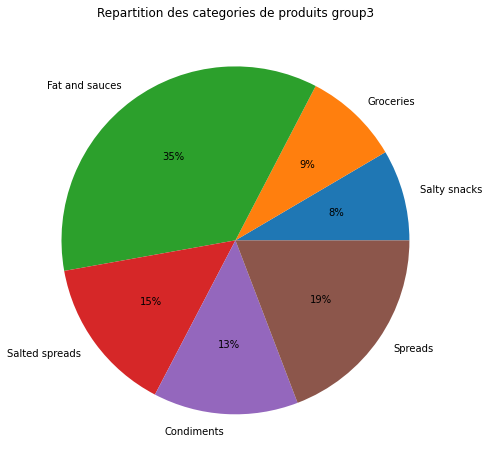

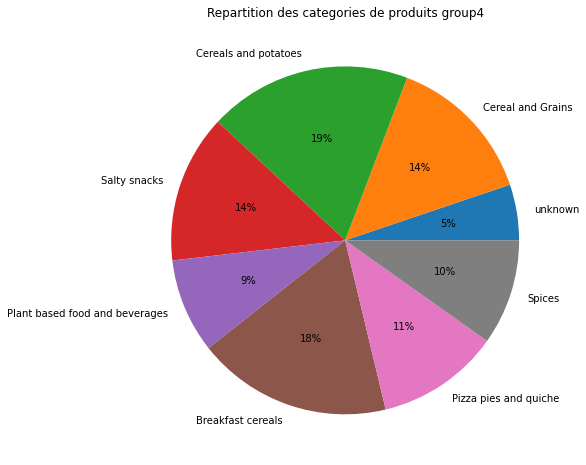

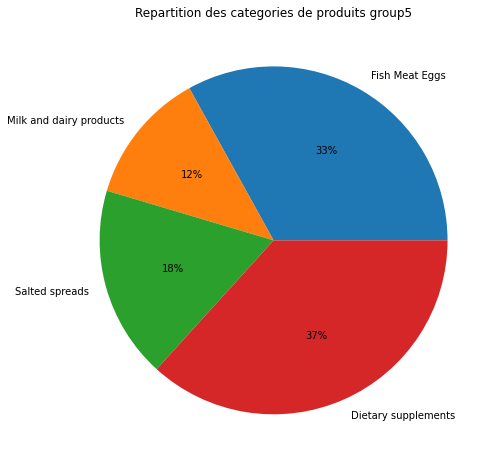

In [97]:
i=0
for gr in ['pctgroup0','pctgroup1','pctgroup2','pctgroup3','pctgroup4','pctgroup5']:
    A=X.loc[X[gr]>0.19, gr]
    plt.figure(figsize=(8,8))
    plt.pie(A, labels=A.index,autopct='%.0f%%')
    plt.title('Repartition des categories de produits group' + str(i))
    plt.show()
    i=i+1
   

## Les tables de correlations entre energy, fat, carbohydrates, proteins et nutri-score
On remarque que les repartitions des taux des indicateurs nutritionelle ent differentes d'un groupe a un autre. Cette difference influ sur les correlations entre ces indicateurs qui sont different a l'interieur de chaque groupe et donc sont different des correlation du dataset initial. Cela est du a la nautre des produits dans chaque groupe.

### Groupe 0

In [85]:
indic=['energy_100g', 'fat_100g','carbohydrates_100g','proteins_100g','nutrition-score-fr_100g']
group0[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.651645,0.466242,0.424620,0.364287
fat_100g,0.651645,1.000000,0.048598,0.195589,0.342152
carbohydrates_100g,0.466242,0.048598,1.000000,0.117939,0.148726
proteins_100g,0.424620,0.195589,0.117939,1.000000,-0.175144
nutrition-score-fr_100g,0.364287,0.342152,0.148726,-0.175144,1.000000


### Groupe 1

In [86]:
group1[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.448043,0.178719,0.213540,0.218065
fat_100g,0.448043,1.000000,0.022538,0.159369,0.021341
carbohydrates_100g,0.178719,0.022538,1.000000,-0.096745,0.210634
proteins_100g,0.213540,0.159369,-0.096745,1.000000,-0.232133
nutrition-score-fr_100g,0.218065,0.021341,0.210634,-0.232133,1.000000


### Groupe 2

In [87]:
group2[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.437738,0.502564,0.309915,0.367277
fat_100g,0.437738,1.000000,-0.173721,0.303111,0.341098
carbohydrates_100g,0.502564,-0.173721,1.000000,-0.087272,0.103792
proteins_100g,0.309915,0.303111,-0.087272,1.000000,0.041534
nutrition-score-fr_100g,0.367277,0.341098,0.103792,0.041534,1.000000


### Groupe 3

In [88]:
group3[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.844788,0.111766,-0.133759,-0.093298
fat_100g,0.844788,1.000000,-0.268700,-0.401343,0.003803
carbohydrates_100g,0.111766,-0.268700,1.000000,0.189944,-0.269277
proteins_100g,-0.133759,-0.401343,0.189944,1.000000,-0.175681
nutrition-score-fr_100g,-0.093298,0.003803,-0.269277,-0.175681,1.000000


### Groupe 4

In [89]:
group4[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.561520,0.226511,0.067431,0.309613
fat_100g,0.561520,1.000000,-0.299326,-0.128105,0.453414
carbohydrates_100g,0.226511,-0.299326,1.000000,0.056866,-0.176881
proteins_100g,0.067431,-0.128105,0.056866,1.000000,-0.292252
nutrition-score-fr_100g,0.309613,0.453414,-0.176881,-0.292252,1.000000


### Groupe 5

In [90]:
group5[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.614675,0.365565,0.330294,0.518251
fat_100g,0.614675,1.000000,-0.135005,-0.072827,0.646007
carbohydrates_100g,0.365565,-0.135005,1.000000,0.189979,-0.057537
proteins_100g,0.330294,-0.072827,0.189979,1.000000,0.027014
nutrition-score-fr_100g,0.518251,0.646007,-0.057537,0.027014,1.000000


### Dataset initial

In [91]:
df1[indic].corr().style.background_gradient()

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.728191,0.543057,0.296866,0.626481
fat_100g,0.728191,1.000000,-0.034846,0.242910,0.532043
carbohydrates_100g,0.543057,-0.034846,1.000000,-0.089943,0.282655
proteins_100g,0.296866,0.242910,-0.089943,1.000000,0.094971
nutrition-score-fr_100g,0.626481,0.532043,0.282655,0.094971,1.000000


# Application pour recommendation de produits sains

In [98]:
def recomandproduit():
    x=input('Entrer le code du produit')
    test=df1[df1['code']==x]
    cat=test['pnns_groups_1']
    memeCateg=df1[(df1['pnns_groups_1'].isin(cat)) & (df1['labels']==1)]
    if test['labels'].values[0]==0:
        print('Ce produit est bon pour vous')
    elif test['labels'].values[0]==4:
        print('Ce produit est bon mais riche en glucide')
        print('Si vous n\'etes pas tres actif, essayez un produit de cette liste:')
        print(memeCateg['product_name'].head(10))
    elif test['labels'].values[0]==5:
        print('Ce produit est bon mais riche en proteine')
        print('Si vous n\'etes pas tres actif, essayez un produit de cette liste:')
        print(memeCateg['product_name'].head(10))
    elif (test['labels'].values[0]==1)| (test['labels'].values[0]==2)| (test['labels'].values[0]==3) :     
        print('Attention ce produit n\'est pas du tout recommende!')
        print('Essayer un produit de la liste suivante')
        print(memeCateg['product_name'].head(10))
    

### Test produit label 0:

In [100]:
recomandproduit()

Entrer le code du produit3021760285220
Ce produit est bon pour vous


### Test produit label 1 

In [102]:
recomandproduit()

Entrer le code du produit55653173106
Attention ce produit n'est pas du tout recommende!
Essayer un produit de la liste suivante
10                 Breaktime, Chocolate Chip Cookies
41                                 Shortcake Cookies
45                     Lindt Les Grandes 32% Amandes
55                                 Kinder Schokolade
58     Make'N Mold, Light Blue Candy Wafers, Vanilla
69                    Ice Cream Cone, Vanilla Krunch
70                                    Ice Cream Bars
100                                Gansito Chocolate
109       Luxury Wafers With Chocolate Cream Filling
114                                   Dark Chocolate
Name: product_name, dtype: object


### Test produit label 2 

In [104]:
recomandproduit()

Entrer le code du produit3045320001525
Attention ce produit n'est pas du tout recommende!
Essayer un produit de la liste suivante
10                 Breaktime, Chocolate Chip Cookies
41                                 Shortcake Cookies
45                     Lindt Les Grandes 32% Amandes
55                                 Kinder Schokolade
58     Make'N Mold, Light Blue Candy Wafers, Vanilla
69                    Ice Cream Cone, Vanilla Krunch
70                                    Ice Cream Bars
100                                Gansito Chocolate
109       Luxury Wafers With Chocolate Cream Filling
114                                   Dark Chocolate
Name: product_name, dtype: object


### Test produit label 4:

In [106]:
recomandproduit()

Entrer le code du produit3250390008354
Ce produit est bon mais riche en glucide
Si vous n'etes pas tres actif, essayez un produit de cette liste:
637                               SNICKERS
757                            Mini Almond
915                Helado de Fresa Natural
1909                    Smarties fun cones
2169    Mousse au chocolat aux œufs frais 
2726              Sahne Wunder Schlagsahne
3611                     Nutrilon Picot AR
4171                   Twix barres glacées
6515    Crème Entière Sucrée Arôme Vanille
7740                       Tyrolia Caramel
Name: product_name, dtype: object
